# Chest Xray Pneumonia Classification

<img src="images/chest_xray.jpeg" alt="Drawing" style="width: 1000px;height:300px;float: left;"/>

## Summary


## Business Understanding

## Data Understanding

In [1]:
import os, shutil
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from keras import regularizers

In [2]:
train_folder = 'chest_xray/train/'
test_folder = 'chest_xray/test/'
val_folder = 'chest_xray/val/'

In [3]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, batch_size=624) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, batch_size=16)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, batch_size=5216)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [4]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [5]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 256, 256, 3)
train_labels shape: (5216, 2)
test_images shape: (624, 256, 256, 3)
test_labels shape: (624, 2)
val_images shape: (16, 256, 256, 3)
val_labels shape: (16, 2)


## Data Preparation

In [6]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 196608)
(624, 196608)
(16, 196608)


In [7]:
train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [50]:
#subsample for faster processing
X_train, X_test, y_train, y_test = train_test_split(train_images, train_y, test_size=0.75)

## Baseline Model

In [22]:
baseline_model = models.Sequential()
baseline_model.add(layers.Dense(5, activation='relu', input_shape=(196608,))) # 1 hidden layer
baseline_model.add(layers.Dense(2, activation='relu'))
baseline_model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
baseline_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
history = baseline_model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
163/163 [==============================] - 3s 20ms/step - loss: 0.6560 - accuracy: 0.7425 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 2/50
163/163 [==============================] - 3s 18ms/step - loss: 0.6105 - accuracy: 0.7429 - val_loss: 0.7299 - val_accuracy: 0.5000
Epoch 3/50
163/163 [==============================] - 3s 16ms/step - loss: 0.5896 - accuracy: 0.7429 - val_loss: 0.7526 - val_accuracy: 0.5000
Epoch 4/50
163/163 [==============================] - 3s 17ms/step - loss: 0.5797 - accuracy: 0.7429 - val_loss: 0.7711 - val_accuracy: 0.5000
Epoch 5/50
163/163 [==============================] - 3s 16ms/step - loss: 0.5750 - accuracy: 0.7429 - val_loss: 0.7856 - val_accuracy: 0.5000
Epoch 6/50
163/163 [==============================] - 3s 16ms/step - loss: 0.5726 - accuracy: 0.7429 - val_loss: 0.7965 - val_accuracy: 0.5000
Epoch 7/50
163/163 [==============================] - 3s 16ms/step - loss: 0.5713 - accuracy: 0.7429 - val_loss: 0.8049 - val_accuracy: 0.5000

In [45]:
def plot_training(history):
    history_dict = history.history
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    acc_values = history_dict['accuracy'] 
    val_acc_values = history_dict['val_accuracy']
    
    loss_values = history_dict['loss'] 
    val_loss_values = history_dict['val_loss']
   
    epochs = range(1, len(acc_values) + 1)
    ax[0].plot(epochs, acc_values, label='Training acc')
    ax[0].plot(epochs, val_acc_values, label='Validation acc')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend();
    
    ax[1].plot(epochs, loss_values, label='Training loss')
    ax[1].plot(epochs, val_loss_values, label='Validation loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend();
    
    print("Final Training Accuracy:", acc_values[-1])
    print("Final Validation Accuracy:", val_acc_values[-1])

Final Training Accuracy: 0.7429064512252808
Final Validation Accuracy: 0.5


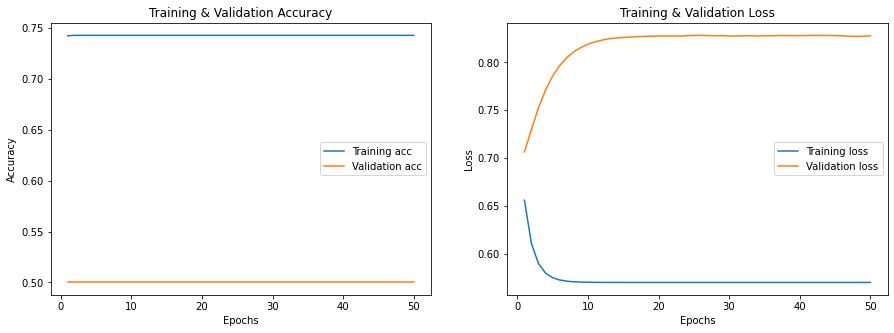

In [46]:
plot_training(history)

## CNN Model #1

In [32]:
cnn_model_1 = models.Sequential()
cnn_model_1.add(layers.Conv2D(6, (3, 3), activation='relu',
                        input_shape=(256 ,256,  3)))
cnn_model_1.add(layers.MaxPooling2D((2, 2)))

cnn_model_1.add(layers.Flatten())
cnn_model_1.add(layers.Dense(10, activation='relu'))
cnn_model_1.add(layers.Dense(1, activation='sigmoid'))

In [33]:
cnn_model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
cnn_history_1 = cnn_model_1.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(val_images, val_y))

Epoch 1/30
21/21 [==============================] - 7s 325ms/step - loss: 0.5851 - accuracy: 0.7255 - val_loss: 0.8027 - val_accuracy: 0.5000
Epoch 2/30
21/21 [==============================] - 7s 341ms/step - loss: 0.5560 - accuracy: 0.7477 - val_loss: 0.8979 - val_accuracy: 0.5000
Epoch 3/30
21/21 [==============================] - 7s 330ms/step - loss: 0.5307 - accuracy: 0.7477 - val_loss: 0.7347 - val_accuracy: 0.5000
Epoch 4/30
21/21 [==============================] - 7s 318ms/step - loss: 0.4908 - accuracy: 0.7477 - val_loss: 0.6499 - val_accuracy: 0.5000
Epoch 5/30
21/21 [==============================] - 6s 307ms/step - loss: 0.4627 - accuracy: 0.7477 - val_loss: 1.2461 - val_accuracy: 0.5000
Epoch 6/30
21/21 [==============================] - 6s 300ms/step - loss: 0.4615 - accuracy: 0.7477 - val_loss: 1.0535 - val_accuracy: 0.5000
Epoch 7/30
21/21 [==============================] - 7s 327ms/step - loss: 0.4318 - accuracy: 0.7477 - val_loss: 0.6540 - val_accuracy: 0.5000
Epoch 

Final Training Accuracy: 0.946319043636322
Final Validation Accuracy: 0.875


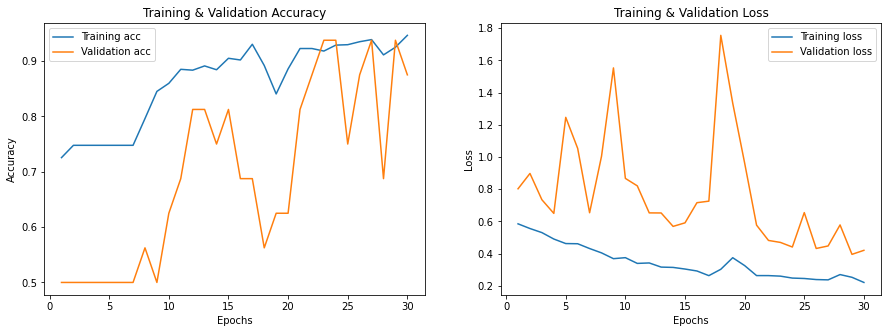

In [47]:
plot_training(cnn_history_1)

## CNN Model #2

In [51]:
cnn_model_2 = models.Sequential()
cnn_model_2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256 ,256,  3)))
cnn_model_2.add(layers.MaxPooling2D((2, 2)))

cnn_model_2.add(layers.Conv2D(32, (4, 4), activation='relu'))
cnn_model_2.add(layers.MaxPooling2D((2, 2)))

cnn_model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model_2.add(layers.MaxPooling2D((2, 2)))

cnn_model_2.add(layers.Flatten())
cnn_model_2.add(layers.Dense(64, activation='relu'))
cnn_model_2.add(layers.Dense(1, activation='sigmoid'))

In [52]:
cnn_model_2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
cnn_history_2 = cnn_model_2.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(val_images, val_y))

Epoch 1/30
21/21 [==============================] - 48s 2s/step - loss: 0.5827 - accuracy: 0.7531 - val_loss: 0.8285 - val_accuracy: 0.5000
Epoch 2/30
21/21 [==============================] - 48s 2s/step - loss: 0.5544 - accuracy: 0.7531 - val_loss: 0.7469 - val_accuracy: 0.5000
Epoch 3/30
21/21 [==============================] - 47s 2s/step - loss: 0.5298 - accuracy: 0.7531 - val_loss: 0.7996 - val_accuracy: 0.5000
Epoch 4/30
21/21 [==============================] - 45s 2s/step - loss: 0.5054 - accuracy: 0.7784 - val_loss: 1.2243 - val_accuracy: 0.5000
Epoch 5/30
21/21 [==============================] - 47s 2s/step - loss: 0.4847 - accuracy: 0.7883 - val_loss: 0.6007 - val_accuracy: 0.7500
Epoch 6/30
21/21 [==============================] - 48s 2s/step - loss: 0.4605 - accuracy: 0.8090 - val_loss: 0.5726 - val_accuracy: 0.7500
Epoch 7/30
21/21 [==============================] - 48s 2s/step - loss: 0.4291 - accuracy: 0.8298 - val_loss: 0.5620 - val_accuracy: 0.7500
Epoch 8/30
21/21 [==

Final Training Accuracy: 0.946319043636322
Final Validation Accuracy: 0.5625


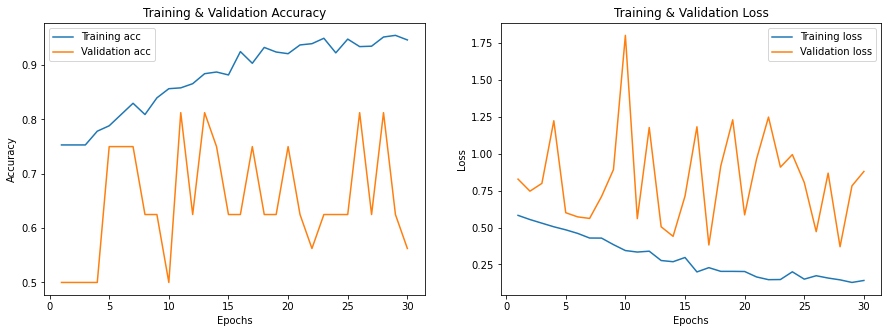

In [54]:
plot_training(cnn_history_2)

## Dropout CNN

In [55]:
cnn_model_3 = models.Sequential()
cnn_model_3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256 ,256,  3)))
cnn_model_3.add(layers.MaxPooling2D((2, 2)))
cnn_model_3.add(layers.Dropout(0.3))

cnn_model_3.add(layers.Conv2D(32, (4, 4), activation='relu'))
cnn_model_3.add(layers.MaxPooling2D((2, 2)))
cnn_model_3.add(layers.Dropout(0.3))

cnn_model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model_3.add(layers.MaxPooling2D((2, 2)))
cnn_model_3.add(layers.Dropout(0.3))

cnn_model_3.add(layers.Flatten())
cnn_model_3.add(layers.Dense(64, activation='relu'))
cnn_model_3.add(layers.Dropout(0.3))
cnn_model_3.add(layers.Dense(1, activation='sigmoid'))

In [56]:
cnn_model_3.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [57]:
cnn_history_3 = cnn_model_3.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(val_images, val_y))

Epoch 1/30
21/21 [==============================] - 49s 2s/step - loss: 0.5703 - accuracy: 0.7393 - val_loss: 0.7042 - val_accuracy: 0.5000
Epoch 2/30
21/21 [==============================] - 49s 2s/step - loss: 0.5296 - accuracy: 0.7531 - val_loss: 0.6701 - val_accuracy: 0.5625
Epoch 3/30
21/21 [==============================] - 48s 2s/step - loss: 0.4908 - accuracy: 0.7830 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 4/30
21/21 [==============================] - 49s 2s/step - loss: 0.4889 - accuracy: 0.7699 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 5/30
21/21 [==============================] - 49s 2s/step - loss: 0.4386 - accuracy: 0.8144 - val_loss: 0.6442 - val_accuracy: 0.6875
Epoch 6/30
21/21 [==============================] - 49s 2s/step - loss: 0.4032 - accuracy: 0.8098 - val_loss: 0.5899 - val_accuracy: 0.7500
Epoch 7/30
21/21 [==============================] - 49s 2s/step - loss: 0.3775 - accuracy: 0.8344 - val_loss: 0.6191 - val_accuracy: 0.6250
Epoch 8/30
21/21 [==

Final Training Accuracy: 0.946319043636322
Final Validation Accuracy: 0.6875


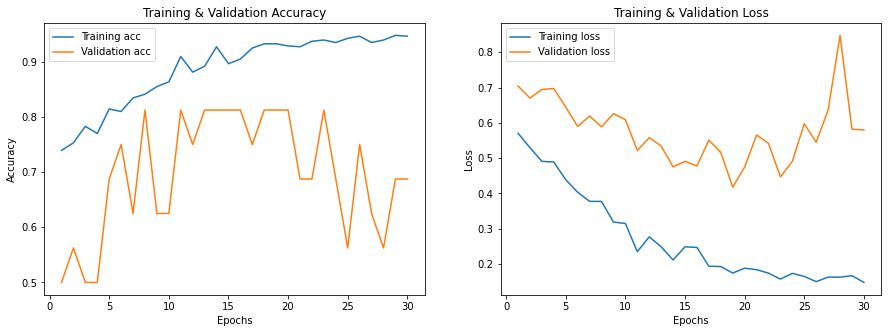

In [58]:
plot_training(cnn_history_3)

## Reduced Complexity with Dropout

In [59]:
cnn_model_4 = models.Sequential()
cnn_model_4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256 ,256,  3)))
cnn_model_4.add(layers.MaxPooling2D((2, 2)))
cnn_model_4.add(layers.Dropout(0.3))

cnn_model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model_4.add(layers.MaxPooling2D((2, 2)))
cnn_model_4.add(layers.Dropout(0.3))

cnn_model_4.add(layers.Flatten())
cnn_model_4.add(layers.Dense(64, activation='relu'))
cnn_model_4.add(layers.Dropout(0.3))
cnn_model_4.add(layers.Dense(1, activation='sigmoid'))

In [60]:
cnn_model_4.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [61]:
cnn_history_4 = cnn_model_4.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(val_images, val_y))

Epoch 1/30
21/21 [==============================] - 45s 2s/step - loss: 0.6910 - accuracy: 0.7032 - val_loss: 0.7138 - val_accuracy: 0.5000
Epoch 2/30
21/21 [==============================] - 44s 2s/step - loss: 0.5651 - accuracy: 0.7531 - val_loss: 0.7441 - val_accuracy: 0.5000
Epoch 3/30
21/21 [==============================] - 43s 2s/step - loss: 0.5452 - accuracy: 0.7531 - val_loss: 0.7504 - val_accuracy: 0.5000
Epoch 4/30
21/21 [==============================] - 43s 2s/step - loss: 0.5215 - accuracy: 0.7531 - val_loss: 0.7446 - val_accuracy: 0.5000
Epoch 5/30
21/21 [==============================] - 43s 2s/step - loss: 0.4932 - accuracy: 0.7531 - val_loss: 0.7466 - val_accuracy: 0.5000
Epoch 6/30
21/21 [==============================] - 44s 2s/step - loss: 0.4561 - accuracy: 0.7531 - val_loss: 0.7401 - val_accuracy: 0.5000
Epoch 7/30
21/21 [==============================] - 44s 2s/step - loss: 0.4556 - accuracy: 0.7531 - val_loss: 0.8241 - val_accuracy: 0.5000
Epoch 8/30
21/21 [==

Final Training Accuracy: 0.9118098020553589
Final Validation Accuracy: 0.8125


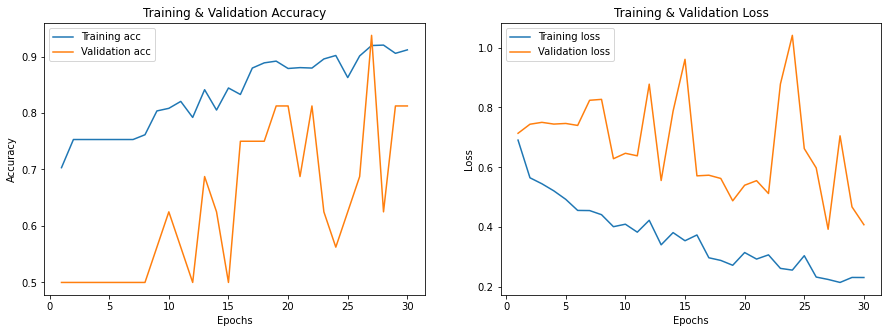

In [62]:
plot_training(cnn_history_4)

### CNN Model 5

In [67]:
cnn_model_5 = models.Sequential()
cnn_model_5.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256 ,256,  3)))
cnn_model_5.add(layers.MaxPooling2D((2, 2)))
cnn_model_5.add(layers.Dropout(0.3))

cnn_model_5.add(layers.Flatten())
cnn_model_5.add(layers.Dense(60, activation='relu'))
cnn_model_5.add(layers.Dropout(0.3))
cnn_model_5.add(layers.Dense(1, activation='sigmoid'))

In [68]:
cnn_model_5.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [69]:
cnn_history_5 = cnn_model_5.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(val_images, val_y))

Epoch 1/30
21/21 [==============================] - 24s 1s/step - loss: 0.6136 - accuracy: 0.7270 - val_loss: 0.7672 - val_accuracy: 0.5000
Epoch 2/30
21/21 [==============================] - 24s 1s/step - loss: 0.5439 - accuracy: 0.7531 - val_loss: 0.8351 - val_accuracy: 0.5000
Epoch 3/30
21/21 [==============================] - 24s 1s/step - loss: 0.4972 - accuracy: 0.7538 - val_loss: 0.8606 - val_accuracy: 0.5000
Epoch 4/30
21/21 [==============================] - 23s 1s/step - loss: 0.4733 - accuracy: 0.7554 - val_loss: 0.6399 - val_accuracy: 0.5625
Epoch 5/30
21/21 [==============================] - 24s 1s/step - loss: 0.4815 - accuracy: 0.7784 - val_loss: 0.6013 - val_accuracy: 0.7500
Epoch 6/30
21/21 [==============================] - 23s 1s/step - loss: 0.4377 - accuracy: 0.7891 - val_loss: 0.6658 - val_accuracy: 0.5625
Epoch 7/30
21/21 [==============================] - 23s 1s/step - loss: 0.3774 - accuracy: 0.8060 - val_loss: 0.8545 - val_accuracy: 0.5000
Epoch 8/30
21/21 [==

Final Training Accuracy: 0.9478527903556824
Final Validation Accuracy: 0.625


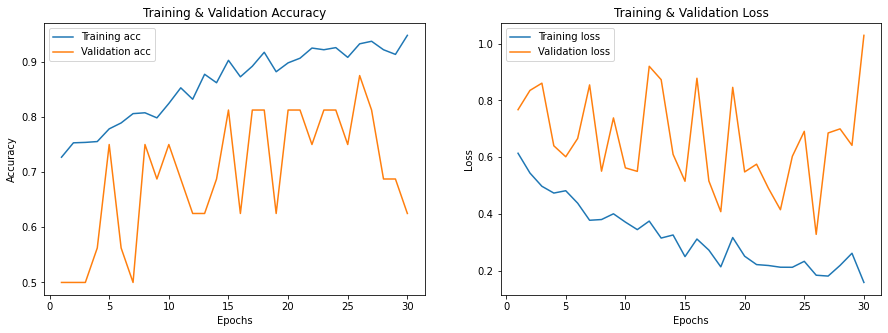

In [70]:
plot_training(cnn_history_5)

## Final Model Evaluation

## Conclusion

## Next Steps